인공지능의 공간 탐색 능력
  - 알파고, 알파스타
    - 현재 게임 상태에서 최적의 다음 상태를 탐색
  - 최적의 화학 구조식을 탐색  

상태공간에 대한 이해
  - 상태공간(바둑, 스도쿠) 은 발생할 수 있는 모든 상태를 포함하는 집합
  - 8 - 퍼즐  : 9! = 362,880

상태공간 트리(state space tree)
  - 상태는 서로 연결되어 있어 트리 형태로 그릴 수 있음
  - 목표 상태를 효율적으로 찾는 지능적인 공간 탐색 알고리즘을 고안해야 함

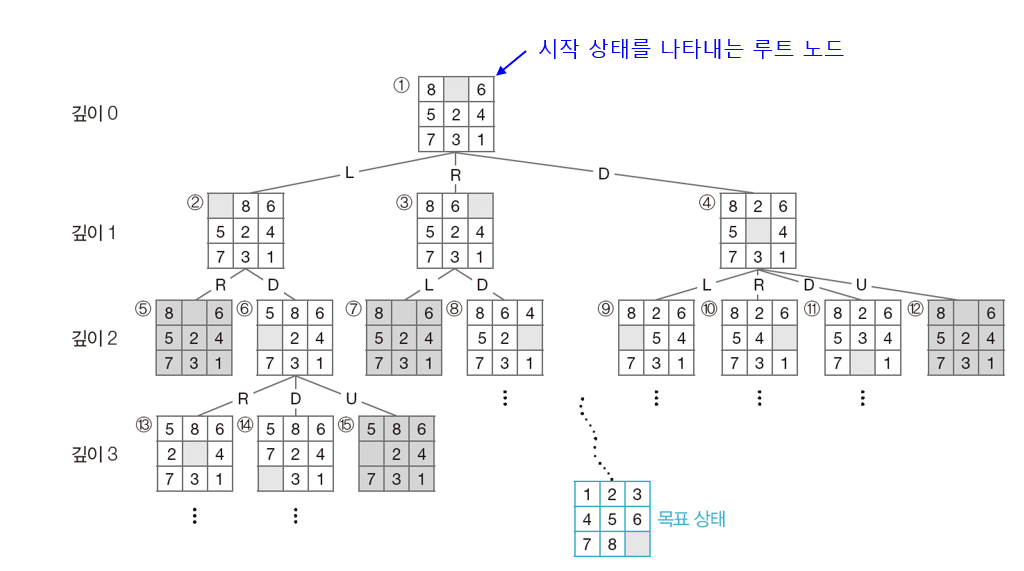

명목탐색(blind search)
  - 효율적인 전략 없이 미리 정해놓은 순서에따라서 탐색하는 알고리즘
  - 너비우선 탐색(BFS) 와 깊이우선 탐색(DFS)
  - 너비우선 탐색
  - 미니맥스 알고리즘= 깊이우선 탐색

너비우선탐색
  - 깊이 0에 있는 노드를 왼쪽부터 오른쪽순으로 모두 방문한다음, 깊이 1로 가서 같은 일을 하고 , 깊이 2로 가서 갚은일을 반복하는 방식 - 그림에서처럼 노드에 매겨진 번호 순서대로 탐색
  - 선입선출 방식 큐 자료구조를 이용 구현

In [1]:
# 알고리즘
# 입력:탐색트리, 시작상태 start
# 빈 큐Q와 빈 리스트 V를 생성
# start를 Q,V에 삽입
# while(Q가 비어있지 않을때 까지)
#   Q에서 요소하나를 꺼내어 node라고 한다
#   if(node가 목표상태)
#     프로그램을 종료
#   else
#     node의 자식을 생성해서 child라고 한다
#     child에 있는 자식중에 v에 들어 있지 않는 것을 Q와 V에 삽입한다

In [4]:
from math import sqrt
from queue import Queue
start = '806524731'
goal = '123456780'
# 보드크기
n = int(sqrt(len(goal)))
def print_puzzle(p):
  for i in range(n):
    print(p[n*i:n*(i+1)])

In [6]:
print_puzzle(start)

806
524
731


In [17]:
def Move(p):  # 빈 칸을 움직여 자식을 생성
  i = p.index('0')
  child=[]
  if not(i%n == 0):  # 좌변이 아니면
    child.append(p[:i-1]+p[i]+p[i-1]+p[i+1:])
  if not (i%n == n-1): # 우변이 아니면
    child.append(p[:i]+p[i+1]+p[i]+p[i+2:])
  if i>=n : # 상변이 아니면
    child.append(p[:i-n]+p[i]+p[i-n+1:i]+p[i-n]+p[i+1:])
  if i< n*n-n:
    child.append(p[:i]+p[i+n]+p[i+1:i+n]+p[i]+p[i+n+1:])
  return child

In [16]:
p = '865204731'
child=[]
i = p.index('0')  # 1
child.append(p[:i-1]+p[i]+p[i-1]+p[i+1:])

child.append(p[:i]+p[i+1]+p[i]+p[i+2:])

child.append(p[:i-n]+p[i]+p[i-n+1:i]+p[i-n]+p[i+1:])

child.append(p[:i]+p[i+n]+p[i+1:i+n]+p[i]+p[i+n+1:])
print(child)



['865024731', '865240731', '805264731', '865234701']


In [ ]:
print_puzzle(start)
Q =Queue()
Q.put(start)  # 루트노드를 삽입
V = [start]
while not Q.empty():
  node = Q.get()
  if node == goal:
    print(len(V),"개 노드를 방문하고 답을 찾았습니다. ")
    break
  else:
    child = Move(node)
    for j in range(len(child)):
      if child[j] not in V:
        Q.put(child[j])
        V.append(child[j])

In [ ]:
# 경로 출력
from math import sqrt
from queue import Queue
start = '806524731'
goal = '123456780'
n = int(sqrt(len(goal))) # 보드크기

class Node():  # 경로를 저장하기 위해서
  def __init__(self,state,path):
    self.state = state
    self.path = path

def print_puzzle(state):
  for i in range(n):
    print(state[n*i:n*(i+1)])

def Move(node):  # node는 Node클래스
  p = node.state
  i = p.index('0')
  child=[]
  if not(i%n == 0):  # 좌변이 아니면
    q = p[:i-1]+p[i]+p[i-1]+p[i+1:]
    child.append(Node(q,node.path+'L'))
  if not (i%n == n-1): # 우변이 아니면
    q = p[:i]+p[i+1]+p[i]+p[i+2:]
    child.append(Node(q,node.path+'R'))
  if i>=n : # 상변이 아니면
    q = p[:i-n]+p[i]+p[i-n+1:i]+p[i-n]+p[i+1:]
    child.append(Node(q,node.path+'U'))
  if i< n*n-n:
    q = p[:i]+p[i+n]+p[i+1:i+n]+p[i]+p[i+n+1:]
    child.append(Node(q,node.path+'D'))
  return child

print_puzzle(start)
Q =Queue()
root = Node(start,'-')
Q.put(root)  # 루트노드를 삽입
V = [root.state]
while not Q.empty():
  node = Q.get()
  if node.state == goal:
    print(len(V),"개 노드를 방문하고 답을 찾았습니다. ")
    break
  else:
    child = Move(node)
    for j in range(len(child)):
      if child[j].state not in V:
        Q.put(child[j])
        V.append(child[j].state)
print(f"{node.path}({len(node.path)-1})")

806
524
731


In [29]:
# 대략 160000 번대의 node 탐색이 이루어지고.. 실제이동은 20번대에서 정답
# 너비우선 탐색은 항상 최적의 해를 보장 -> 모든 깊이에서 가능한 모든 자식 노드를 살피기 때문
# 최적해를 보장하지만 너무 많은 대안을 살핀다-모든경우의수 느리다....
# 맹목탐색의 비효율성은 주어진 문제의 특성을 이용하지 않는다.
# 최고 우선 탐색은 자식을 평가한 후 가장 좋은 자식을 먼저 방문

상태의 좋은 정도를 측정하는 평가함수:evaluation function
  - 인공지능에서는 평가 함수를 휴리스틱 함수 : heuristic function
  - 두 가지 휴리스틱 함수
    - 불일치 수 : 제자리에 없는 수를 셈
    - 맨해튼 거리의 합 : 제자리를 찾아가는데 필요한 거리의 합


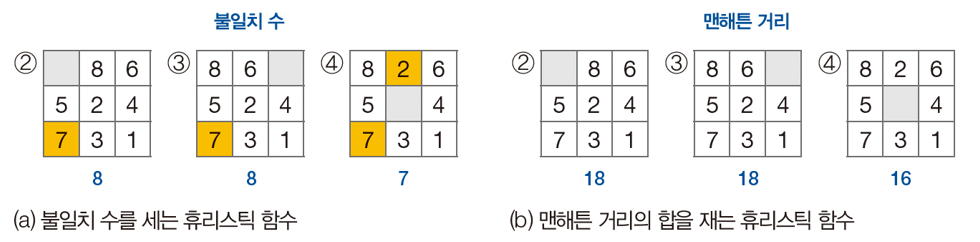    